# Übung 4 - P6 / Theoretische Bauphysik

## <div style="text-align: right"> *Andreas Beck* </div>

Es soll der Strahlungsdurchgriff durch eine Solarwand berechnet werden. Eingabegrößen, Systemeigenschaften und die symbolische Lösung des Gleichungssystems sind im folgenden beschrieben.

### 1. Schritte nachvollziehen und das Ergebnis verstehen

Untersuchtes System : wie in der Vorlesung behandelt.

Hinweis zur Beschriftung: Die $\Delta$s habe ich weggelassen;-)!

![grafik.png](grafik_beck1.png)

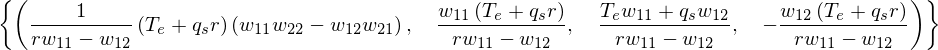

In [4]:
# Gleichungen
from sympy import symbols, init_printing, linsolve, cosh, sinh

# Pretty printing
init_printing()

q_r, T_e, T, r, q, q_r, q_s, w11, w12, w21, w22, q_i = symbols('q_r, T_e, T, r, q, q_r, q_s, w11, w12, w21, w22, q_i')

eq1 = q_r * r - (T_e - T)
eq2 = q - q_r - q_s
eq3 = w11 * T + w12 * q
eq4 = q_i - w21 * T - w22 * q

equations = [eq1, eq2, eq3, eq4]
variables = [q_i, q, q_r, T]

# Hinweis: / scheint sympy nicht immer zu verstehen und det(W) = 1

# Lösen
linsolve(equations, variables)

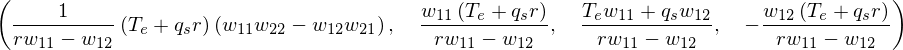

In [5]:
# Get the unique solution out of the solutions Set
solution, = linsolve(equations, variables)
solution

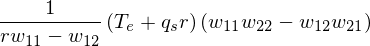

In [6]:
# Get the solution for q_i (the first one in tuple)
q_i = solution[0]
q_i

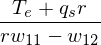

In [7]:
q_i = q_i.subs({(w11*w22 - w12*w21): 1}) # det(W) is 1
q_i

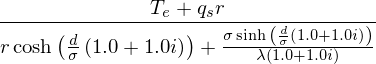

In [8]:
z, sigma, lam, d = symbols('z sigma lambda d')
q_i = q_i.subs({
    w11: cosh(z),
    w12: -1/((1 + 1j)*lam/sigma)*sinh(z),
    z:d/sigma*(1+1j)
})
q_i

In [9]:
q_i_value = abs(q_i).evalf(subs = {
    T_e: 10,
    q_s: 200,
    r: 0.33,
    sigma: 0.15,
    d: 0.3,
    lam:0.5}) # Evaluate q_i without changing its expression

print('q_i = %.1f W/m²' % q_i_value)

q_i = 41.3 W/m²


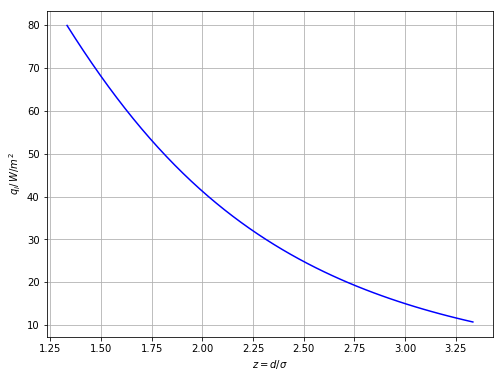

In [10]:
import pylab
import numpy as np
from pylab import figure, axes, pie, title, show

fig = figure(1, figsize=(8, 6))
T_e = 10
q_s = 200
r = 0.33
sigma = 0.15
lam = 0.5
d = np.linspace(0.2, 0.5, 50)
arg = d/sigma*(1 + 1j)
z = d/sigma
w11 = np.cosh(arg)
w12 = - 1/((1 + 1j)*lam/sigma)*np.sinh(arg)

q_i = np.abs((T_e + q_s*r)/(r*w11 - w12))

pylab.plot(z, q_i, 'b-')
pylab.grid(True)
pylab.ylabel('$q_{i} / \, W/m^{2}$')
pylab.xlabel('$z = d/\sigma$')
pylab.show()

### 2. Man berechne die Temperatur auf der Außenwandoberfläche und stelle diese in einem Plot dar.

### 3. Man erweitere das Modell durch Hinzufügen eines Kondensators mit adiabatem Abschluss (s.u.), nehme einen sinnvollen Wert an und berechne die Innentemperaturamplitude.

![grafik_beck2.png](grafik_beck2.png)

Nun eure Ergebnisse;-)